## Введение в глубокое обучение
### Занятие 2. Метод обратного распространения ошибки, функции активации

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

#### План занятия:
0. Повторение базовых понятий из мира нейронных сетей
1. Введение в PyTorch
2. Метод обратного распространения ошибки (backpropagation)
3. Обзор различных функций активации
4. Построение нейронной сети и сравнение с классическими методами

### Базовые понятия при работе с нейронными сетями

__Нейронная сеть (neural network)__ – композиция линейных и нелинейных преобразований. В целом, нейронная сеть представляет собой сложную (параметрическую) функцию $f$, задающую отображение из исходного признакового пространства $\mathbb{X}_O$ в целевое пространство $\mathbb{Y}$:
$$
f: \;\;\; \mathbb{X}_O \longrightarrow \mathbb{Y}.
$$
Часто нейронные сети представляют собой последовательность преобразований, представленных слоями и функциями активации.

__Слой (layer)__ – некоторая функция/преобразование над исходными данными. Простейший пример: линейный слой, являющийся линейным преобразованием над входящими данными (т.е. просто преобразование $WX +b$, как и в линейной регрессии).

__Функция активации (activation function)__ – нелинейное преобразование, применяющееся ко всем данным пришедшим на вход поэлементно. Благодаря функциям активации нейронные сети способны преобразовывать данные *нелинейным образом*, что позволяет порождать более информативные признаковые описания.

__Функция потерь (loss function)__ – функция потерь, оценивающая качество полученного предсказания. Как правило, от функции потерь требуется свойство дифференцируемости.

![img](https://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)
### Введение в PyTorch

[__PyTorch__](http://pytorch.org/) – один из основных фреймворков в DL на текущий момент. Его серьезным преимуществом является способность динамически строить граф вычислений. Все вычисления могут производиться в тот момент, когда вы к ним обращаетесь, что значительно упрощает как обучение, так и отладку моделей. Также он способен *автоматически вычислять градиенты*, *использовать GPU для ускорения вычислений* и в целом значительно упрощает разработку методов машинного обучения, основанных на нейронных сетях.

Синтаксис в PyTorch во многом похож на Numpy. Рассмотрим подробнее различия и сходства.

In [1]:
import numpy as np
import torch
print('PyTorch version: {}'.format(torch.__version__))
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output

PyTorch version: 1.10.0


Создадим матрицу и применим к ней несколько базовых операций сначала с помощью numpy:

In [2]:
# numpy world

x = np.arange(16).reshape(4,4)

print("X :\n%s\n" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s\n" % (x + 5))
print("X*X^T  :\n%s\n" % np.dot(x,x.T))
print("mean over cols :\n%s\n" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s\n" % (np.cumsum(x,axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



А затем с помощью PyTorch:

In [3]:
# pytorch world

x = np.arange(16).reshape(4,4)

x = torch.tensor(x, dtype=torch.float32) #or torch.arange(0,16).view(4,4)

print ("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print ("add 5 :\n%s" % (x + 5))
print ("X*X^T  :\n%s" % torch.matmul(x,x.transpose(1,0)))  #short: x.mm(x.t())
print ("mean over cols :\n%s" % torch.mean(x,dim=-1))
print ("cumsum of cols :\n%s" % torch.cumsum(x,dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])

add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


Как можно заметить, их синтаксис крайне похож, что значительно упрощает изучение и использование PyTorch.
Стоит заметить, что совместимость [не является полной](https://github.com/pytorch/pytorch/issues/50344), и смешивать `numpy` и `torch` неявным образом не стоит.

Из различий в синтаксисе, например, стоит подметить:

* Для указания нужной оси координат в PyTorch используется `dim`, в отличие от `axis` в numpy
 * `x.sum(axis=-1) -> x.sum(dim=-1)`
* Приведение типов производится по-другому:
 * `x.astype('int64') -> x.type(torch.LongTensor)`
 
И, конечно, numpy не позволяет использовать GPU и автоматически вычислять градиенты.

Воспользуемся PyTorch на простом тригонометрическом примере (основанном на данной [публикации](https://www.quora.com/What-are-the-most-interesting-equation-plots)):

Вычислим значения данной параметрической функции с помощью PyTorch:

$$ x(t) = t - 1.5 * cos( 17 t) $$
$$ y(t) = t - 1.5 * sin( 25 t) $$


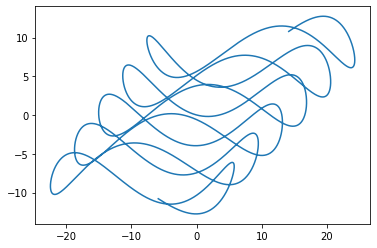

In [4]:
t = torch.linspace(-10, 10, steps = 10000)

# compute x(t) and y(t) as defined above
x = t - 15 * torch.cos(1.7*t) # <your_code_here>
y = t - 3 * torch.sin(5*t) # <your_code_here>

plt.plot(x.numpy(), y.numpy())

Попробуйте также поменять параметры и пронаблюдать, как меняется график для их различных значений.

### Метод обратного распространения ошибки и автоматическое вычисление градиентов в PyTorch

Как уже не раз упоминалось, PyTorch позволяет автоматически вычислять градиенты.  Каждый "тензор" в PyTorch обладает булевым свойством `requires_grad`. Если ему присвоено значение `True`, то по данному тензору может быть посчитан градиент.

Общая процедура выглядит следующим образом:
* Пусть `x = torch.arange(5, requires_grad=True)`.
* Результат операции суммирования будет равен `b = torch.sum(x)`.
* Для вычисления градиентов достаточно вызвать метод `b.backward()` у результата операции суммирования.
* После этого у `x` появятся градиенты $\frac{\delta b}{\delta x}$.

Также стоит помнить, что если `x` одновременно участвует в нескольких операциях, то градиенты от них __суммируются__.


Рассмотрим на интерактивном примере:

In [5]:
x = torch.arange(10, dtype=torch.float32, requires_grad=True)
print(x)
print('gradients before backward call:', x.grad)
b = x.sum()

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], requires_grad=True)
gradients before backward call: None


In [6]:
c = x.mean()

In [7]:
c.backward()

In [8]:
b.backward()

In [10]:
print('b={}'.format(b))
b.backward()
print('gradients after backward call:', x.grad)

b=45.0
gradients after backward call: tensor([3.1000, 3.1000, 3.1000, 3.1000, 3.1000, 3.1000, 3.1000, 3.1000, 3.1000,
        3.1000])


#### Упрощенная задача оценки стоимости жилья
Воспользуемся рассмотренными методами для решения задачи оценки стоимости жилья с использованием набора данных _Boston house-prices dataset_. Для начала рассмотрим одномерный случай.

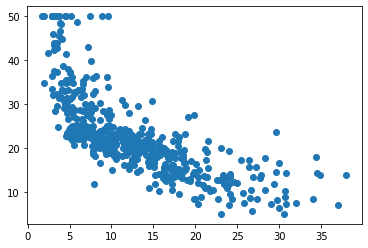

In [27]:
from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

In [28]:
boston.data.shape

(506, 13)

In [29]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:,-1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [30]:
y_pred = w * x + b
loss = torch.mean( (y_pred - y)**2 )

In [31]:
b.grad

In [32]:
# propagete gradients
loss.backward()

Градиенты можно увидеть в поле `.grad` у всех переменных, которые их "требуют".

In [33]:
print("dL/dw = {}\n".format(w.grad))
print("dL/db = {}\n".format(b.grad))

dL/dw = tensor([-47.3514])

dL/db = tensor([-45.0656])



Ввиду накопления градиентов по умолчанию, __очищать их между шагами градиентного спуска необходимо вручную__.

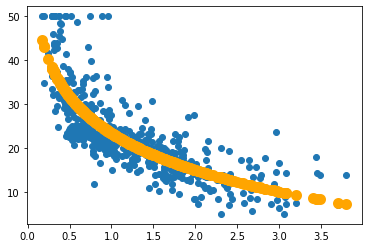

loss =  28.3435


In [34]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:,-1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

for i in range(100):

    y_pred = w * torch.log(x) + b
    loss = torch.mean( (y - y_pred)**2 ) 
    loss.backward()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

Модель сходится и даже делает предсказания неплохого качества. Но, судя по графику, зависимость явно не является линейной.

__Задача__: Попробуйте доработать код выше, чтобы регрессионная модель стала нелинейной. Помните о том, что вычисление градиентов происходит автоматически, т.е. достаточно лишь поменять способ вычисления `y_pred`. 

___ 

___ 

___
________________________________________________________________
________________________________________________________________
________________________________________________________________
________________________________________________________________
________________________________________________________________
________________________________________________________________
После того, как вы справились с задачей выше, полезно обратить внимание на один небольшой, но очень важный момент: все значения тензора `x` были поделены на "волшебную" константу 10. Посмотрим, что произойдет, если этого не делать:

In [35]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

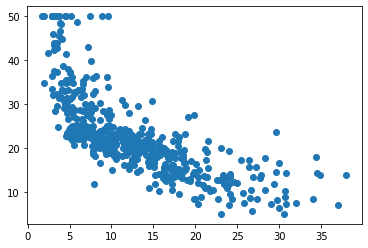

loss =  nan


In [37]:
# Now we do not divide the x values by 10. See what happens next
x = torch.tensor(boston.data[:,-1], dtype=torch.float32)

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)


grad_history = []

for i in range(100):

    y_pred = w * x  + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()
    grad_history.append((w.grad.item(), b.grad.item()))

    # Be extremely careful with accessing the .data attribute!
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


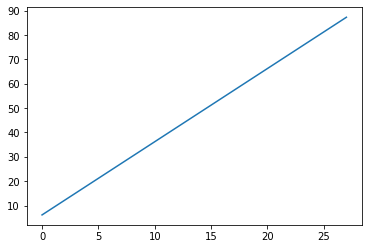

In [38]:
plt.plot([np.log(np.abs(element[0])) for element in grad_history], )

In [39]:
# print(grad_history)

Как вы могли заметить, мы столкнулись с "взрывом градиентов" (exloding gradients). Данная проблема является достаточно частой, и для ее решения используется нормировка данных, понижение learning rate или же техника _gradient clipping_, которая будет рассмотрена позднее.

Константа 10 в данном случае была подобрана вручную. Лучше пользоваться классическими методами нормировки, например вручную:

In [40]:
x_normed = boston.data.copy()[:, -1]
x_normed -= np.mean(x_normed)
x_normed /= np.std(x_normed)
print(x_normed.mean(axis=0, keepdims=True).shape)
print(x_normed.std(axis=0, keepdims=True).shape)
boston.data[:,-1].shape

(1,)
(1,)


(506,)

In [41]:
x_normed.shape

(506,)

In [42]:
x_normed

array([-1.07556230e+00, -4.92439366e-01, -1.20872740e+00, -1.36151682e+00,
       -1.02650148e+00, -1.04332233e+00, -3.12676184e-02,  9.10700206e-01,
        2.42177359e+00,  6.23343950e-01,  1.09292612e+00,  8.64783596e-02,
        4.28502391e-01, -6.15792295e-01, -3.35444728e-01, -5.86355801e-01,
       -8.51284251e-01,  2.82721656e-01, -1.34996218e-01, -1.92467469e-01,
        1.17282518e+00,  1.64975678e-01,  8.50425479e-01,  1.01302707e+00,
        5.11204923e-01,  5.40641418e-01,  3.02345986e-01,  6.48575231e-01,
        2.05966814e-02, -9.43458210e-02,  1.39429976e+00,  5.42383894e-02,
        2.11058779e+00,  7.98561179e-01,  1.07750701e+00, -4.16745523e-01,
       -1.74244877e-01, -5.44303666e-01, -3.53667320e-01, -1.16807700e+00,
       -1.49608365e+00, -1.09518663e+00, -9.59218064e-01, -7.30734797e-01,
       -4.34968115e-01, -3.42453418e-01,  2.09831289e-01,  8.61639382e-01,
        2.54512652e+00,  4.97187545e-01,  1.11709641e-01, -4.51788969e-01,
       -1.03351017e+00, -

Или же с использованием средств `sklearn`:


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(boston.data)

Или с использованием средств PyTorch и др.

Из примера выше можно сделать простой вывод:

__Будьте осторожны при использовании градиентных методов оптимизации. Даже в случае использования простых моделей (например, линейной регрессии), требуется аккуратная настройка гиперпараметров и качественная предобработка данных.__
___

Таким образом, при аккуратном использовании PyTorch может вычислять производные для очень сложных выражений. Для более детального разбора данного механизма обратимся к слайдам.

__Go to slides__

___
### Реальная задача и высокоуровневое API PyTorch
Наконец, применим полученные знания для решения задачи предсказания цены квартиры уже с использованием всех данных. В этом нам поможет высокоуровневое API PyTorch, которым мы воспользуемся далее.

Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

In [44]:
from torch import nn
from torch.nn import functional as F

Еще раз обратимся к стуктуре базового класса `nn.Module`:

In [45]:
nn.Module()

Module()

In [46]:
print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    :ivar training: Boolean represents whether this module is in training or
                    evaluation mode.
    :vartype training: bool
    


Рассмотрим наши полные данные:

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)

y_train_torch = torch.tensor(y_train, dtype=torch.float32)[:, None]
y_test_torch = torch.tensor(y_test, dtype=torch.float32)[:, None]

In [51]:
boston.data.shape

(506, 13)

In [52]:
X_train_torch.shape

torch.Size([379, 13])

Построим простейшую линейную модель. Для объединения нескольких последовательных преобразований можно воспользоваться `nn.Sequential`:

In [53]:
print(nn.Sequential.__doc__)

A sequential container.
    Modules will be added to it in the order they are passed in the
    constructor. Alternatively, an ``OrderedDict`` of modules can be
    passed in. The ``forward()`` method of ``Sequential`` accepts any
    input and forwards it to the first module it contains. It then
    "chains" outputs to inputs sequentially for each subsequent module,
    finally returning the output of the last module.

    The value a ``Sequential`` provides over manually calling a sequence
    of modules is that it allows treating the whole container as a
    single module, such that performing a transformation on the
    ``Sequential`` applies to each of the modules it stores (which are
    each a registered submodule of the ``Sequential``).

    What's the difference between a ``Sequential`` and a
    :class:`torch.nn.ModuleList`? A ``ModuleList`` is exactly what it
    sounds like--a list for storing ``Module`` s! On the other hand,
    the layers in a ``Sequential`` are connected

In [54]:
NUM_FEATURES = X_train.shape[1]

In [55]:
# Creating model instance
model = nn.Sequential()

model.add_module('l1', nn.Linear(NUM_FEATURES, 1))

На текущий момент в нашей модели лишь один слой:

In [56]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([1, 13]), torch.Size([1])]


Рассмотрим поведение нашей модели на данных подходящей размерности:

In [57]:
example_input = X_train_torch[:3]
example_target = y_train_torch[:3]

# compute outputs given inputs, both are variables
y_predicted = model(example_input)

y_predicted # display what we've got

tensor([[ 0.4860],
        [-0.3427],
        [ 0.1993]], grad_fn=<AddmmBackward0>)

В качестве функции потерь воспользуемся среднеквадратичной ошибкой MSE. Она также уже реализована в виде класса в PyTorch: `nn.MSELoss` (или в виде функции `F.mse_loss`).

In [58]:
loss_function = nn.MSELoss()

In [59]:
loss = loss_function(y_predicted, example_target)

In [60]:
loss

tensor(326.9503, grad_fn=<MseLossBackward0>)

Теперь мы сможем вычислить градиенты простым вызовом `loss.backward()`. Но перед этим введем последнее улучшение в базовый pipeline для одномерного случая. В нем мы реализовывали градиентный спуск вручную. Конечно, на практике используются уже реализованные механизмы оптимизации, такие как `SGD, Momentum, RMSProp, Adam` и другие. Они доступны в `torch.opt`.

In [61]:
opt = torch.optim.SGD(model.parameters(), lr=0.01)

In [62]:
# Get the gradients
loss.backward()   

# Make a step
opt.step()          

# Remove the gradients from the previous step
opt.zero_grad()

Наконец, нейронная сеть отлажена и мы можем запустить процедуру обучения (далее используется уже нейросеть из нескольких слоев):

In [65]:
# Creating model instance
model = nn.Sequential()

model.add_module('l1', nn.Linear(NUM_FEATURES, 16))
model.add_module('tanh', nn.Tanh())
model.add_module('l2', nn.Linear(16, 1))


loss_function = nn.MSELoss()

opt = torch.optim.SGD(model.parameters(), lr=0.01)

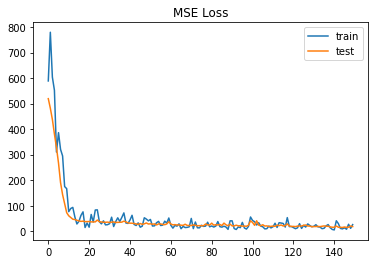

In [66]:
NUM_EPOCH = 150
train_loss_history, test_loss_history = [], []

for epoch_num in range(NUM_EPOCH):
    opt.zero_grad()
    
    random_indices = np.random.choice(np.arange(len(X_train_torch)), size=32)
    X_train_torch_batch = X_train_torch[random_indices]
    y_train_torch_batch = y_train_torch[random_indices]
    y_predicted = model(X_train_torch_batch)
    loss = loss_function(y_predicted, y_train_torch_batch)
    loss.backward()
    opt.step()
    
    train_loss_history.append(loss.item()) # Always use .item() to store scalars in logs!
    
    with torch.no_grad():
        y_predicted_test = model(X_test_torch)
        test_loss_history.append(loss_function(y_predicted_test, y_test_torch).item())
    # the rest of code is just bells and whistles

    clear_output(True)
    plt.plot(np.arange(len(train_loss_history)), train_loss_history, label='train')
    plt.plot(np.arange(len(test_loss_history)), test_loss_history, label='test')
    plt.title('MSE Loss')
    plt.legend()
    plt.show()


Ввиду небольших размеров датасета, мы оценивали значение функции потерь и градиенты сразу на всех выборке на каждом шаге. __При работе с крупными датасетами необходимо разбиение на подвыборки (батчи)__. Аналогичное разбиение мы использовали в предыдущем занятии и еще не раз с ним столкнемся.

Теперь вернемся выше и попробуем теперь сделать нейронную сеть глубже используя несколько слоев.

In [67]:
print('Final NN MSE on train data: {:.3f}'.format(train_loss_history[-1]))
print('Final NN MSE on test data: {:.3f}'.format(test_loss_history[-1]))

Final NN MSE on train data: 25.819
Final NN MSE on test data: 18.031


Сравним полученные результаты с `Random Forest` и линейной регрессией из `sklearn`:

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [69]:
lr_sklearn = LinearRegression().fit(X_train, y_train)
print('Final sklearn Linear Regression MSE on train data: {:.3f}'.format(
    mean_squared_error(lr_sklearn.predict(X_train), y_train)
))
print('Final sklearn Linear Regression MSE on test data: {:.3f}'.format(
    mean_squared_error(lr_sklearn.predict(X_test), y_test)
))

Final sklearn Linear Regression MSE on train data: 21.143
Final sklearn Linear Regression MSE on test data: 26.166


In [70]:
rf_sklearn = RandomForestRegressor(n_estimators=50).fit(X_train, y_train)
print('Final sklearn Random Forest MSE on train data: {:.3f}'.format(
    mean_squared_error(rf_sklearn.predict(X_train), y_train)
))
print('Final sklearn Random Forest MSE on test data: {:.3f}'.format(
    mean_squared_error(rf_sklearn.predict(X_test), y_test)
))

Final sklearn Random Forest MSE on train data: 1.599
Final sklearn Random Forest MSE on test data: 13.246


Как можно заметить, результаты линейной модели в PyTorch сопоставимы с результатами `sklearn`. Но линейная модель – лишь частный, простейший случай нейронной сети, и PyTorch позволяет с легкостью дорабатывать ее, в то время как в `sklearn` для учета нелинейных зависимостей необходимо генерировать признаки вручную или же использовать другие классы моделей (например, ансамбли деревьев).

### Выводы:
* Механизм обратного распространения ошибки (backprop) – основной принцип обучения всех современный нейронных сетей. В его основе лежит простейшая математика.
* Отличная статья на тему понимания backprop за авторством Andrej Karpathy (один из авторов курса Stanford CS231n, ex. Tesla Head of AI): [Yes, you should understand backprop](https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b)
* Функции активации позволяют нейронным сетям автоматически выделять нелинейные зависимости между признаками и использовать их для решения задачи.
* Различные функции активации обладают различными свойствами. О них стоит помнить, используя их на практике. Отличное решение по умолчанию: ReLU.
* Благодаря механизму backpropagation и использованию нелинейных функций активации, нейронные сети способны самостоятельно выучивать информативные промежуточные представления данных, что является одним из наиболее важных отличий от "классических" моделей.